In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model 

In [23]:
df=pd.read_csv('C:/Users/rillh/OneDrive/Desktop/Grade Prediction/data.csv')
df.head(15)

,Socioeconomic_Score,Study_Hours,Sleep_Hours,Attendance_per,Grades
0,0.95822,3.4,8.2,53,47
1,0.85566,3.2,5.9,55,35
2,0.68025,3.2,9.3,41,32
3,0.25936,3.2,8.2,47,34
4,0.60447,3.8,10.0,75,33
5,0.98320,3.4,9.0,47,51
6,0.56648,7.9,8.1,63,54
7,0.93487,1.4,8.0,47,34
8,0.46660,5.4,8.8,67,39
9,0.62130,1.4,9.6,42,34


In [24]:
import math 
median_grade=df.Grades.median()
df.Grades.fillna(median_grade)
median_grade

35.0

In [25]:

median_ses=df.Socioeconomic_Score.median()
df.Socioeconomic_Score.fillna(median_ses)
median_ses

0.5459449999999999

In [26]:

median_sh=df.Study_Hours.median()
df.Study_Hours.fillna(median_sh)
median_sh

3.9

In [27]:
median_slh=df.Sleep_Hours.median()
df.Study_Hours.fillna(median_slh)
median_slh 

8.4

In [28]:
print(df.columns)  # Check available columns
print(df.head())   # Verify data structure
if 'Attendance_per' in df.columns:
    median_attendance = df['Attendance_per'].median()
    df['Attendance_per'].fillna(median_attendance, inplace=True)
else:
    print("Column 'Attendance_per' does not exist in the DataFrame.")


Index(['Socioeconomic_Score', 'Study_Hours', 'Sleep_Hours', 'Attendance_per ',
       'Grades'],
      dtype='object')
   Socioeconomic_Score  Study_Hours  Sleep_Hours  Attendance_per   Grades
0              0.95822          3.4          8.2               53      47
1              0.85566          3.2          5.9               55      35
2              0.68025          3.2          9.3               41      32
3              0.25936          3.2          8.2               47      34
4              0.60447          3.8         10.0               75      33
Column 'Attendance_per' does not exist in the DataFrame.


In [29]:
# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Now proceed with your calculations
median_attendance = df.Attendance_per.median()
df.Attendance_per.fillna(median_attendance, inplace=True)
print(median_attendance)


57.0


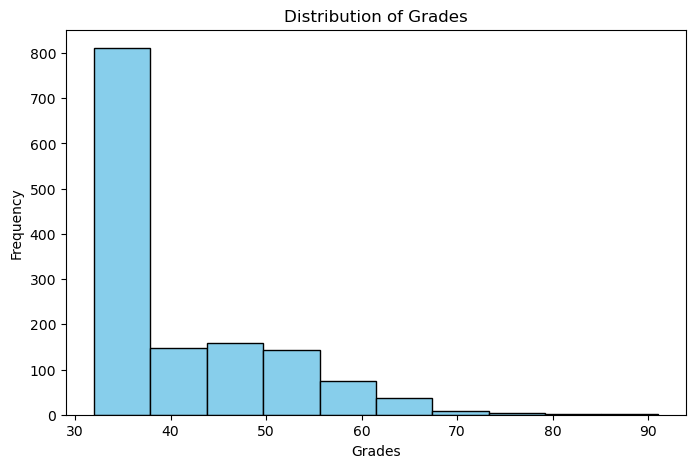

In [30]:
# 1. Histogram of Grades
plt.figure(figsize=(8, 5))
plt.hist(df['Grades'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Grades')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.show()


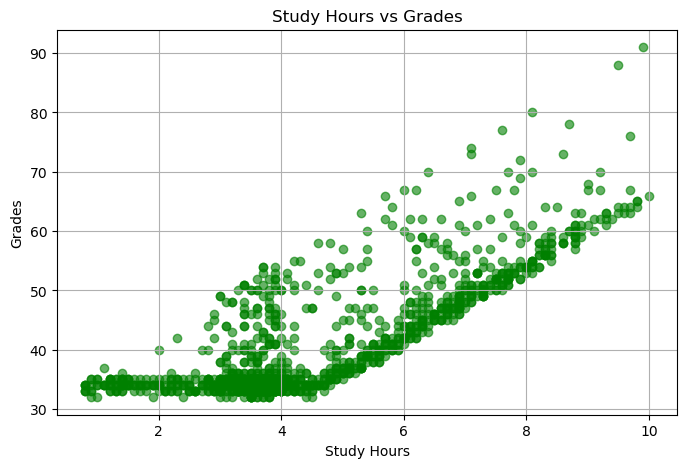

In [31]:
# 2. Scatter Plot: Study Hours vs Grades
plt.figure(figsize=(8, 5))
plt.scatter(df['Study_Hours'], df['Grades'], color='green', alpha=0.6)
plt.title('Study Hours vs Grades')
plt.xlabel('Study Hours')
plt.ylabel('Grades')
plt.grid(True)
plt.show()

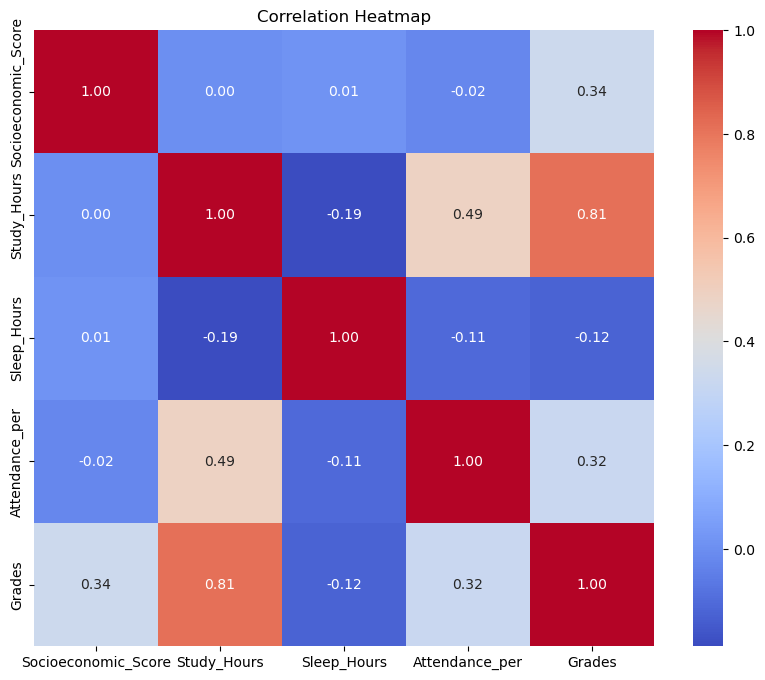

In [11]:
# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()  # Compute pairwise correlations
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

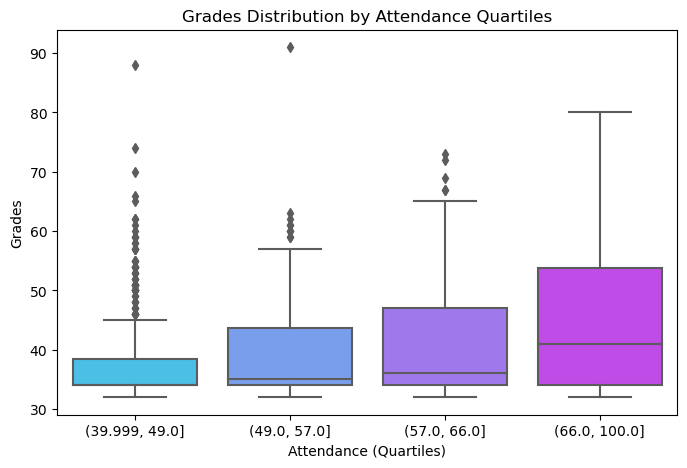

In [12]:
# 4. Attendance vs Grades Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=pd.qcut(df['Attendance_per'], q=4, duplicates='drop'), y=df['Grades'], palette='cool')
plt.title('Grades Distribution by Attendance Quartiles')
plt.xlabel('Attendance (Quartiles)')
plt.ylabel('Grades')
plt.show()

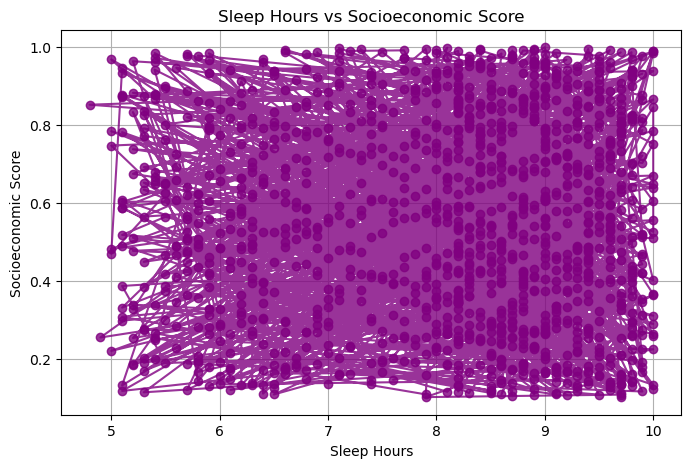

In [13]:
# 5. Line Plot: Sleep Hours vs Socioeconomic Score
plt.figure(figsize=(8, 5))
plt.plot(df['Sleep_Hours'], df['Socioeconomic_Score'], marker='o', color='purple', linestyle='-', alpha=0.8)
plt.title('Sleep Hours vs Socioeconomic Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Socioeconomic Score')
plt.grid(True)
plt.show()

In [32]:
import pandas as pd 
import numpy as np 
from sklearn import linear_model 
import math 
from math import floor
import pickle

median_grades= floor(df.Grades.median())
median_grades




35

In [33]:
# Training the model

reg=linear_model.LinearRegression()
reg.fit(df[['Socioeconomic_Score', 'Sleep_Hours', 'Study_Hours','Attendance_per']], df.Grades)
reg.coef_ 
reg.intercept_
reg.predict([[0.96,3.5,8.5,50]])

c:\Users\rillh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([62.2590873])

In [34]:
reg.predict([[0.80,4.0,7.8,46]])

c:\Users\rillh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57.70087592])

In [20]:
Socioecon_Score = float(input("Enter socio-economic score: "))
Sleep_Hour = float(input("Enter sleep hours: "))
Study_hours = float(input("Enter study hours: "))
Attendance_per = float(input("Enter attendance Percentage: "))

result = reg.predict([[Socioecon_Score,Sleep_Hour,Study_hours,Attendance_per]])  
print(result)

[57.70087592]


c:\Users\rillh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:


import pickle

# Assuming 'model' is your trained model
with open("linear_regression_model.pkl", "wb") as f:
    pickle.dump(reg, f)
